<a href="https://colab.research.google.com/github/MattJCR/Diffusion_in_Colab/blob/master/Stable_Diffusion_V1-5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EASY STABLE DIFFUSION IMPLEMENTATION (V1-5 UPDATE)

*You need to configure GPU hardware accelerator to work properly*

In [5]:
!nvidia-smi

Mon Dec 26 15:46:43 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    33W /  70W |   8698MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **Setup**

In [ ]:
!pip install --upgrade diffusers transformers scipy accelerate
!pip install torch torchvision -f https://download.pytorch.org/whl/torch_stable.html

In [19]:
# Import the required packages
from diffusers import StableDiffusionPipeline
import torch
import gc
import random

gc.collect()
print('torch:',torch.__version__)
models_ids = ["CompVis/stable-diffusion-v1-4","runwayml/stable-diffusion-v1-5"]

# Create a StableDiffusionPipeline object and move it to a GPU
pipe = StableDiffusionPipeline.from_pretrained(models_ids[1]).to('cuda')
def dummy(images, **kwargs): return images, False 

torch: 1.13.0+cu116


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

# **Stable Diffusion**

seed: -54671810081


  0%|          | 0/100 [00:00<?, ?it/s]

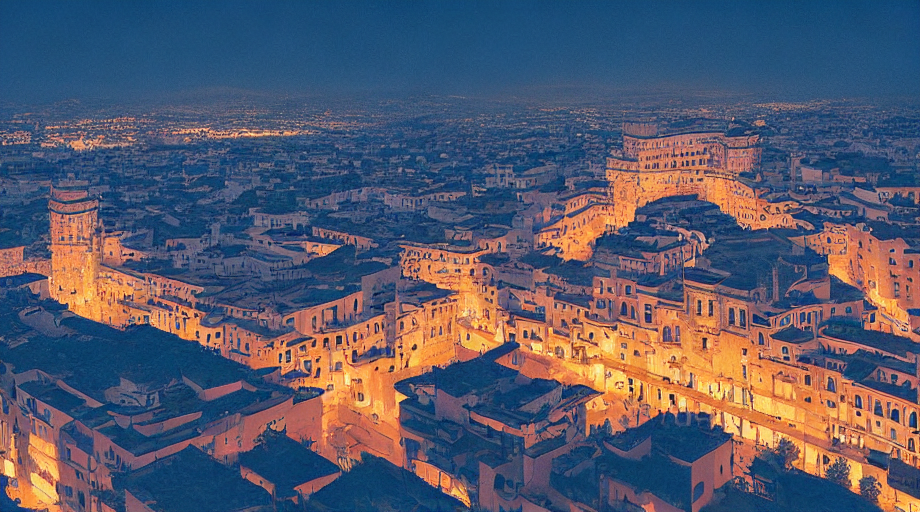

In [18]:
#@title Configuration { vertical-output: true, form-width: "50%" }

# Set the number of inference steps to use
steps = 100 #@param {type:"slider", min:1, max:100, step:1}
# Define the text prompt
prompt = "a beautiful matte masterpiece of futuristic Granada Andalusia at night by atelier olschinsky and moebius, trending on artstation, featured on behance " #@param {type:"string"}
negative_prompt = "clean day"#@param {type:"string"}
#@markdown * Prompts examples in https://lexica.art/
# Define the seed prompt
seed = -54671810081 #@param {type:"raw"}
enable_NSFW = True #@param {type:"boolean"}

width = 920 #@param {type:"slider", min:640, max:1920, step:8}
height = 512 #@param {type:"slider", min:360, max:1080, step:8}

if enable_NSFW:
  pipe.safety_checker = dummy
if seed == None:
  seed = random.randint(-99999999999,99999999999)
print('seed:',seed)
# Set the random seed for deterministic output
generator = torch.Generator("cuda").manual_seed(seed)

# Generate the image
image = pipe(prompt, negative_prompt=negative_prompt, num_inference_steps=steps, generator=generator, width=width, height=height).images[0]
# image = pipe(prompt, num_inference_steps=steps).images[0]
image